In [1]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
import matplotlib.pylab as plt

In [2]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import glob
import os
from sklearn.model_selection import train_test_split
import csv
from skimage.io import imread, imsave
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix

In [3]:
train_dataset = '/Users/ericyao/Documents/AARD/Lung/archive/raw2_png/Training'
testing_dataset = '/Users/ericyao/Documents/AARD/Lung/archive/raw2_png/Testing'

In [4]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory("/Users/ericyao/Documents/AARD/Lung/archive/raw2_png/Training",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory("/Users/ericyao/Documents/AARD/Lung/archive/raw2_png/Testing", target_size=(224,224))

Found 90 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [5]:
img_paths = glob.glob(os.path.join(train_dataset, '*/*.png'))
parent_names = [os.path.basename(os.path.abspath(os.path.join(p, os.pardir))) for p in img_paths]
labels = np.asarray([1 if p == '1' else 2 if p == '2' 
                    else 3 for p in parent_names])
imgs = np.asarray([imread(p) for p in img_paths])
len(img_paths)

90

In [6]:
df = pd.read_csv('metadata3.csv')

print(df.shape)
df.head()

(4695, 7)


,Filename,StudyDate,BrixiaScoreGlobal,Subject,StudyId,Sex,AgeAtStudyDateFiveYear
0,15626316918619298757.png,20200403,1,P2255,A0000,M,11
1,14564261561865340756.png,20200406,2,P2291,A0001,M,8
2,3030367955559789319.png,20200405,1,P2272,A0002,M,11
3,10548672632742803246.png,20200408,3,P2299,A0003,M,12
4,434139174381164494.png,20200409,2,P2076,A0004,M,8


In [7]:
x_train, x_test, y_train, y_test = train_test_split(imgs, labels, test_size = 0.25, random_state = 1)

In [8]:
y_test

array([3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 2, 1, 3, 2, 1, 1, 2, 2, 3, 1,
       2])

In [9]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation= "relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

2022-08-31 18:34:24.818236: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=3, activation="softmax"))

In [11]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
opt = Adam(lr=0.00001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/Users/ericyao/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [13]:
import math
compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / 32))

steps_per_epoch = compute_steps_per_epoch(90)
val_steps = compute_steps_per_epoch(60)

In [14]:
history = model.fit_generator(steps_per_epoch=steps_per_epoch,generator=traindata, validation_data= testdata, validation_steps=val_steps,epochs=10)

/var/folders/nz/nbjnbmrx2zv9sqt5nsvq53v80000gn/T/ipykernel_1795/1085862246.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(steps_per_epoch=steps_per_epoch,generator=traindata, validation_data= testdata, validation_steps=val_steps,epochs=10)


Epoch 1/10
3/3 [==============================] - 149s 53s/step - loss: 1.1831 - accuracy: 0.2889 - val_loss: 1.0396 - val_accuracy: 0.5500
Epoch 2/10
3/3 [==============================] - 145s 48s/step - loss: 0.9956 - accuracy: 0.6667 - val_loss: 0.9902 - val_accuracy: 0.5833
Epoch 3/10
3/3 [==============================] - 186s 69s/step - loss: 0.9211 - accuracy: 0.6556 - val_loss: 0.9163 - val_accuracy: 0.6167
Epoch 4/10
3/3 [==============================] - 145s 54s/step - loss: 0.8166 - accuracy: 0.7444 - val_loss: 0.8608 - val_accuracy: 0.5667
Epoch 5/10
3/3 [==============================] - 134s 50s/step - loss: 0.7110 - accuracy: 0.8000 - val_loss: 0.7452 - val_accuracy: 0.7667
Epoch 6/10
3/3 [==============================] - 116s 41s/step - loss: 0.6012 - accuracy: 0.8111 - val_loss: 0.7340 - val_accuracy: 0.6333
Epoch 7/10
3/3 [==============================] - 97s 33s/step - loss: 0.5077 - accuracy: 0.8889 - val_loss: 0.5914 - val_accuracy: 0.7667
Epoch 8/10
3/3 [=====

In [15]:
scores = model.predict(testdata, verbose = 1)

2/2 [==============================] - 14s 6s/step


In [16]:
scores1 = model.predict(traindata, verbose = 1)

3/3 [==============================] - 21s 6s/step


In [17]:
model.evaluate(traindata, verbose = 1)

3/3 [==============================] - 21s 7s/step - loss: 0.2599 - accuracy: 0.9222


[0.2598636746406555, 0.9222221970558167]

In [18]:
model.evaluate(testdata, verbose = 1)

2/2 [==============================] - 14s 6s/step - loss: 0.4468 - accuracy: 0.8833


[0.44679901003837585, 0.8833333253860474]

In [19]:
preds = np.argmax(scores, axis = 1)

In [20]:
preds

array([1, 2, 2, 0, 2, 2, 0, 0, 2, 2, 1, 1, 1, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       1, 1, 0, 0, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 2, 0, 1, 2, 0, 2, 0, 1,
       0, 2, 1, 1, 0, 1, 0, 2, 2, 1, 1, 0, 2, 2, 2, 0])

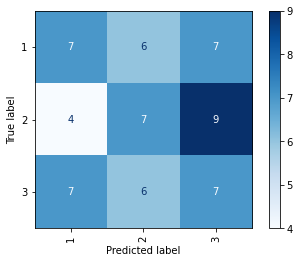

In [21]:
matrix = confusion_matrix(testdata.classes, preds)
disp = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = traindata.class_indices)
disp = disp.plot(cmap = plt.cm.Blues)
plt.xticks(rotation = 90)
plt.show()

In [22]:
matrix

array([[7, 6, 7],
       [4, 7, 9],
       [7, 6, 7]])

In [23]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[0].set(xlim=(0, 10), ylim=(0, 2))
    ax[0].set_xlabel('Epochs')
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[1].set(xlim=(0, 10), ylim=(0, 1))
    ax[1].set_xlabel('Epochs')
    ax[0].legend()
    ax[1].legend()

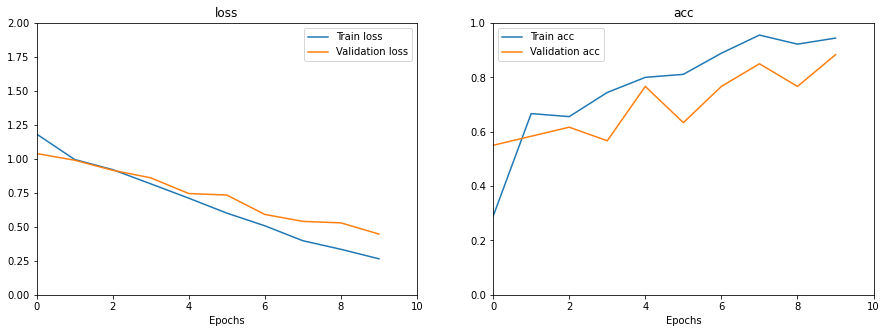

In [24]:
show_final_history(history)